## Data analysis - Vaccines 

Questions 
  - Em que momento houve maior distribuição de vacinas 
  - Porcentagem de homens e mulheres que tomaram vacinas por idade 

In [13]:
import pandas as pd 

vaccines_df = pd.read_csv('../data/campinas_2021_22_23_vaccines.csv')
vaccines_df['date'] = pd.to_datetime(vaccines_df['date'])
vaccines_2021_df = vaccines_df[vaccines_df['date'].dt.year == 2021]
vaccines_df.head()



,date,state,city,ibgeID,dose,vaccine,sex,age,count,pop2021
0,2021-01-17,SP,Campinas/SP,3509502,1,Sinovac,F,25-29,1,1223237
1,2021-01-17,SP,Campinas/SP,3509502,1,Sinovac,F,50-54,1,1223237
2,2021-01-17,SP,Campinas/SP,3509502,2,Pfizer/BioNTech,F,20-24,1,1223237
3,2021-01-17,SP,Campinas/SP,3509502,2,Sinovac,F,55-59,1,1223237
4,2021-01-18,SP,Campinas/SP,3509502,1,Sinovac,F,20-24,1,1223237


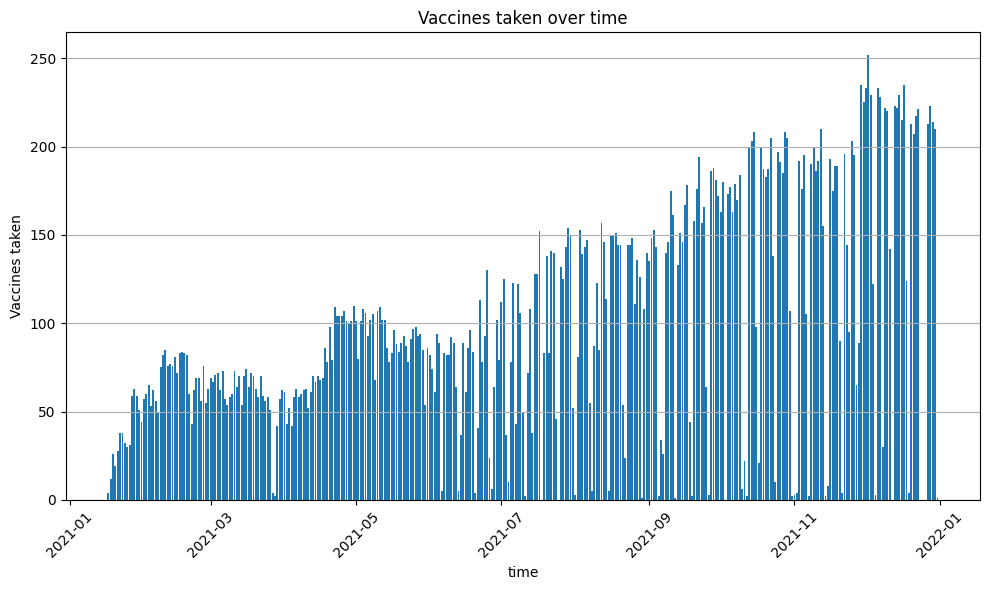

In [14]:
import matplotlib.pyplot as plt 

date = pd.to_datetime(vaccines_2021_df['date'])
date_counts = vaccines_2021_df['date'].value_counts().reset_index()
date_counts.columns = ['date', 'count']

date_counts = date_counts.sort_values(by='date')


plt.figure(figsize=(10, 6))
plt.bar(date_counts['date'], date_counts['count'], width=0.8, align='center')

plt.title('Vaccines taken over time')
plt.xlabel('time')
plt.ylabel('Vaccines taken')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
# Line graph with plotly
import plotly.express as px 

fig = px.line(date_counts, x='date', y='count', title='Vaccines taked over time')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Count')


In [18]:
vaccine_types = vaccines_2021_df['vaccine'].value_counts().reset_index()
vaccine_types.columns = ['vaccine_type', 'count']
vaccine_types['percentage'] = (vaccine_types['count'] / vaccine_types['count'].sum()) * 100

fig = px.pie(vaccine_types, names='vaccine_type', values='percentage', title='Distribuição dos tipos de vacinas')
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()